In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, MeanShift, SpectralClustering

In [2]:
track_features = (
    pd.read_csv("./data/mini_data/data/track_features/tf_mini.csv")
    .set_index("track_id")
)
track_features['mode'] = (track_features['mode'] == 'major').astype('int32')
track_features.head()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
track_id,,,,,,,,,,,,,,,,,,,,,
t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [3]:
track_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50704 entries, t_a540e552-16d4-42f8-a185-232bd650ea7d to t_aec0dda3-19b4-4222-be07-327c12f21456
Data columns (total 29 columns):
duration                  50704 non-null float64
release_year              50704 non-null int64
us_popularity_estimate    50704 non-null float64
acousticness              50704 non-null float64
beat_strength             50704 non-null float64
bounciness                50704 non-null float64
danceability              50704 non-null float64
dyn_range_mean            50704 non-null float64
energy                    50704 non-null float64
flatness                  50704 non-null float64
instrumentalness          50704 non-null float64
key                       50704 non-null int64
liveness                  50704 non-null float64
loudness                  50704 non-null float64
mechanism                 50704 non-null float64
mode                      50704 non-null int32
organism                  50704 non-null float64

Start by cutting down on the number of features with `PCA` before clustering...

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
track_features.columns.shape

(29,)

In [6]:
pca = PCA(n_components=10)
pca_track_features = pca.fit_transform(track_features)
pca_track_features.shape

(50704, 10)

`PCA` has (semi-)scaled the data to be mean 0

In [7]:
print("# Mean & Std by PCA Column #")
print("---+---------------+--------")
print(" i |      mean     |   std")
print("---+---------------+--------")
for i in range(10):
    print("%2d |  %+.9f | %6.3f" % (i, pca_track_features[:,i].mean(), pca_track_features[:,i].std()))

# Mean & Std by PCA Column #
---+---------------+--------
 i |      mean     |   std
---+---------------+--------
 0 |  +0.000000000 | 72.241
 1 |  -0.000000000 | 29.791
 2 |  -0.000000000 | 11.410
 3 |  +0.000000000 |  3.820
 4 |  +0.000000000 |  3.593
 5 |  -0.000000000 |  2.417
 6 |  -0.000000000 |  1.135
 7 |  +0.000000000 |  0.536
 8 |  +0.000000000 |  0.454
 9 |  +0.000000000 |  0.386


In [8]:
N_CLUSTERS = 20

Create clusters with `KMeans`...

In [9]:
kmeans = KMeans(
    n_clusters=N_CLUSTERS
).fit(pca_track_features)

In [10]:
kmeans_labels = pd.Series(
    kmeans.labels_,
    index=track_features.index,
    name=f"kmeans_{N_CLUSTERS}"
)

In [22]:
kmeans_labels.head()

track_id
t_a540e552-16d4-42f8-a185-232bd650ea7d    15
t_67965da0-132b-4b1e-8a69-0ef99b32287c    17
t_0614ecd3-a7d5-40a1-816e-156d5872a467    17
t_070a63a0-744a-434e-9913-a97b02926a29    17
t_d6990e17-9c31-4b01-8559-47d9ce476df1    10
Name: kmeans_20, dtype: int32

In [28]:
kmeans_labels.reset_index().to_csv(
    "kmeans_pca_clusters.csv",
    index=False
)

***

What if we try clustering just the `acoustic_vectors`

In [31]:
acoustic_vectors = track_features[[c for c in track_features.columns if "acoustic_vector" in c]]
acoustic_vectors.head()

,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
track_id,,,,,,,,
t_a540e552-16d4-42f8-a185-232bd650ea7d,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
t_67965da0-132b-4b1e-8a69-0ef99b32287c,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
t_0614ecd3-a7d5-40a1-816e-156d5872a467,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
t_070a63a0-744a-434e-9913-a97b02926a29,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
t_d6990e17-9c31-4b01-8559-47d9ce476df1,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [38]:
acoustic_vectors.agg(['mean','std'])

,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
mean,-0.332295,0.202193,0.153935,-0.040526,-0.027247,0.049475,-0.197758,0.005153
std,0.416320,0.254024,0.212660,0.333129,0.377457,0.144205,0.349840,0.324259


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_vecs = scaler.fit_transform(acoustic_vectors)

In [52]:
print(" i |    mean  |    std")
print("---+----------+----------")
for i in range(8):
    print(" %d | %+.5f | %+.5f" % (i, scaled_vecs[:,i].mean(), scaled_vecs[:,i].std()))

 i |    mean  |    std
---+----------+----------
 0 | -0.00000 | +1.00000
 1 | +0.00000 | +1.00000
 2 | +0.00000 | +1.00000
 3 | -0.00000 | +1.00000
 4 | -0.00000 | +1.00000
 5 | -0.00000 | +1.00000
 6 | +0.00000 | +1.00000
 7 | +0.00000 | +1.00000


In [53]:
N_CLUSTERS = 10

In [55]:
kmeans = KMeans(
    n_clusters=N_CLUSTERS
).fit(scaled_vecs)

kmeans_labels = pd.Series(
    kmeans.labels_,
    index=acoustic_vectors.index,
    name=f"kmeans_acoustic_{N_CLUSTERS}"
)

kmeans_labels.value_counts().sort_index()

0    15197
1     4584
2     4556
3     4126
4     3563
5     5557
6     1100
7     7202
8     3445
9     1374
Name: kmeans_acoustic_10, dtype: int64

Cluster with `DBSCAN`...

In [56]:
dbscan = DBSCAN().fit(scaled_vecs)

dbscan_labels = pd.Series(
    dbscan.labels_,
    index=acoustic_vectors.index,
    name=f"dbscan_acoustic"
)

dbscan_labels.value_counts().sort_index()

-1      4094
 0     45801
 1        27
 2        15
 3         8
 4       301
 5        30
 6        97
 7         7
 8        70
 9        19
 10       16
 11       13
 12        6
 13       26
 14        7
 15        5
 16        7
 17        5
 18        4
 19        5
 20        4
 21       10
 22        5
 23        4
 24        4
 25        5
 26       16
 27        5
 28        9
 29        6
 30        5
 31        5
 32        4
 33        4
 34        5
 35        6
 36        5
 37        5
 38        5
 39        4
 40        5
 41        5
 42        4
 43        2
 44        5
 45        4
Name: dbscan_acoustic, dtype: int64

Create `MeanShift` clusters...

In [57]:
meanshift = MeanShift().fit(scaled_vecs)

meanshift_labels = pd.Series(
    dbscan.labels_,
    index=acoustic_vectors.index,
    name=f"meanshift_acoustic"
)

meanshift_labels.value_counts().sort_index()

KeyboardInterrupt: 

Create clusters with `SpectralClustering`...

In [ ]:
spectral = SpectralClustering(
    n_clusters=N_CLUSTERS
).fit(scaled_vecs)

spectral_labels = pd.Series(
    spectral.labels_,
    index=track_features.index,
    name=f"spectral_{N_CLUSTERS}"
)

spectral_labels.value_counts().sort_index()

Create clusters with `AgglomerativeClustering`...

In [ ]:
agglom = AgglomerativeClustering(
    n_clusters=N_CLUSTERS
).fit(scaled_vecs)

agglom_labels = pd.Series(
    agglom.labels_,
    index=track_features.index,
    name=f"agglom_{N_CLUSTERS}"
)

agglom_labels.value_counts().sort_index()

Now turn that into a `DataFrame` that can be joined with the original data

In [17]:
track_clusters = pd.DataFrame([
    kmeans_labels,
    dbscan_labels,
    meanshift_labels,
    agglom_labels,
    spectral_labels
]).transpose()
track_clusters.head()

,kmeans_20,dbscan
track_id,,
t_a540e552-16d4-42f8-a185-232bd650ea7d,15,-1
t_67965da0-132b-4b1e-8a69-0ef99b32287c,17,-1
t_0614ecd3-a7d5-40a1-816e-156d5872a467,17,-1
t_070a63a0-744a-434e-9913-a97b02926a29,17,-1
t_d6990e17-9c31-4b01-8559-47d9ce476df1,10,-1


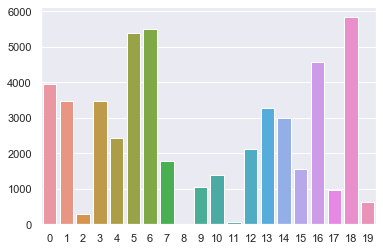

In [19]:
kmeans_dist = track_clusters.kmeans_20.value_counts()
sns.barplot(
    kmeans_dist.index,
    kmeans_dist.values
)

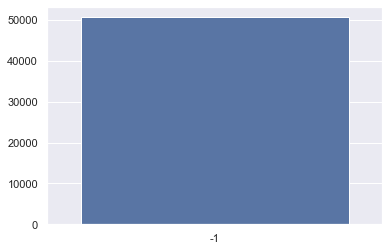

In [20]:
dbscan_dist = track_clusters.dbscan.value_counts()
sns.barplot(
    dbscan_dist.index,
    dbscan_dist.values
)

In [ ]:
track_clusters.to_pickle("./track_clusters.pkl")

In [ ]:
# training_set = pd.read_csv("./data/data/mini_data/training_set/log_mini.csv")